In [10]:
import torch
import torchvision
import torch.nn as nn
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [11]:
batch_size = 64

training_data = torchvision.datasets.MNIST(
    root='./data', 
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = torchvision.datasets.MNIST(
    root='./data', 
    train=False,
    download=True,
    transform=ToTensor()
)

train_loader = torch.utils.data.DataLoader(
    training_data, 
    batch_size=batch_size, 
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_data, 
    batch_size=batch_size, 
    shuffle=False
)

In [12]:
class MnistModel(nn.Module):
    def __init__(self):
        super(MnistModel, self).__init__()

        self.hidden_1 = nn.Linear(784, 256) # flattened input (28 * 28 -> 784)
        self.hidden_2 = nn.Linear(256, 128)
        self.out = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, inputs):
        x = self.dropout(self.relu(self.hidden_1(inputs)))
        x = self.dropout(self.relu(self.hidden_2(x)))
        x = self.out(x)
        
        return x

In [13]:
model = MnistModel()
print(model)

MnistModel(
  (hidden_1): Linear(in_features=784, out_features=256, bias=True)
  (hidden_2): Linear(in_features=256, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)


In [14]:
def train_model(model, criterion, optimizer, epochs=5, device='cpu'):
    model = model.to(device)

    for epoch in range(epochs):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            data = data.view(-1, 784)
            
            output = model(data)
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"epoch: {epoch}    loss: {loss}")

In [15]:
cross_entropy = torch.nn.CrossEntropyLoss()
adam = torch.optim.Adam(model.parameters(), lr=0.001)

train_model(model, cross_entropy, adam, epochs=15, device='cuda')

epoch: 0    loss: 0.18451480567455292
epoch: 1    loss: 0.1272057592868805
epoch: 2    loss: 0.14142091572284698
epoch: 3    loss: 0.11022572219371796
epoch: 4    loss: 0.0006689182482659817
epoch: 5    loss: 0.09874684363603592
epoch: 6    loss: 0.32898563146591187
epoch: 7    loss: 0.006738806143403053
epoch: 8    loss: 0.004638139624148607
epoch: 9    loss: 0.00014537794049829245
epoch: 10    loss: 0.01205416675657034
epoch: 11    loss: 0.02881051041185856
epoch: 12    loss: 0.006374878343194723
epoch: 13    loss: 0.00010276676039211452
epoch: 14    loss: 0.0050817630253732204


In [16]:
def test_model(model, device='cpu'):
    model = model.to(device)
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(-1, 784)

            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)

            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

In [17]:
test_model(model, 'cuda')

Test Accuracy: 98.24%


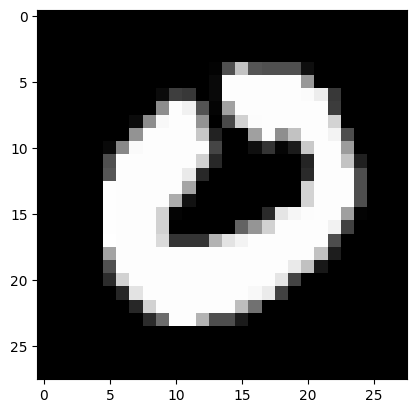

In [18]:
img, label = test_data[25]
plt.imshow(img.squeeze(), cmap="gray")

In [19]:
def inference(model, entry_idx, device='cpu'):
    model.to(device)
    model.eval()

    with torch.no_grad():
        data, _ = test_data[entry_idx]
        data = data.to(device)
        data = data.view(-1, 784)

        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)

        print(f'Predicted digit: {predicted[0]}')

In [20]:
inference(model, 25, 'cuda')

Predicted digit: 0
